# 질병군과 종속변수들의 관계를 통계분석

In [1]:
# 표준 라이브러리
import sys
from pathlib import Path
import platform

# 서드파티 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 로컬 모듈
sys.path.append(str(Path.cwd().parent))
from utils import DATA_DIR, FONT_DIR
from utils import TTest, Chi2Test

In [2]:
# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

mpl.rcParams['axes.unicode_minus'] = False

# 로컬 폰트 지정
font_path = FONT_DIR / 'HakgyoansimBareondotumB.ttf'
fm.fontManager.addfont(str(font_path))
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 컬러 지정
colors = ["#0A4EE4", "#AED6E0", "#9BC4D5", "#5271B7", "#758A98", "#3E4E5F", "#5D3A99", "#9370DB"]


In [ ]:
pandas_kwargs = {
    'memory_map': True,
    'parse_dates': ['출생일자', '검정일자'],
    'date_format': '%Y-%m-%d',
}

milk_data: pd.DataFrame = pd.read_csv(DATA_DIR / 'processed' / 'milk.csv', **pandas_kwargs)
milk_data

,농장아이디,개체번호,검정일자,누적착유일(연계),유지방율,유단백,무지고형분,체세포수,MUN,305일유량,...,공태일수,분만후첫수정일까지일수,질병군,비유단계,계절,농장구분,가격,가격미달,분만간격,분만월령
0,21133,20071210010043,2021-03-18,445,6.60,3.28,8.87,274,11.6,15158.0,...,NaN,236.0,0,2,1,1,1062.31,0,NaN,144
1,21133,20071210010043,2021-04-28,486,3.64,3.33,8.91,166,11.0,15158.0,...,NaN,236.0,0,2,1,1,1029.40,0,NaN,144
2,21133,20071210010043,2021-05-20,508,2.61,3.35,9.14,156,10.8,15158.0,...,NaN,236.0,0,2,1,1,916.10,0,NaN,144
3,21133,20071210010043,2021-06-25,544,3.75,3.49,8.99,307,14.1,15158.0,...,NaN,236.0,0,2,2,1,1036.56,0,NaN,144
4,21133,20071210010043,2021-07-07,556,3.68,3.74,9.31,34,16.2,15158.0,...,NaN,236.0,0,2,2,1,1039.70,0,NaN,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40259,21149,20210101010061,2021-12-04,106,4.22,3.10,8.81,140,16.3,7577.0,...,0.0,26.0,0,4,4,0,1067.99,0,NaN,25
40260,21149,20210101010062,2021-11-01,12,4.11,3.71,9.44,307,9.7,NaN,...,0.0,NaN,0,4,3,0,1062.31,0,NaN,26
40261,21149,20210101010062,2021-12-04,45,4.38,3.17,9.09,20,14.2,NaN,...,0.0,NaN,0,4,4,0,1075.75,0,NaN,26
40262,21149,20210101010065,2021-11-01,9,5.21,4.16,9.75,285,12.5,NaN,...,0.0,NaN,0,4,3,0,1062.31,0,NaN,26


## t-test 실행

In [4]:
ttest = TTest()

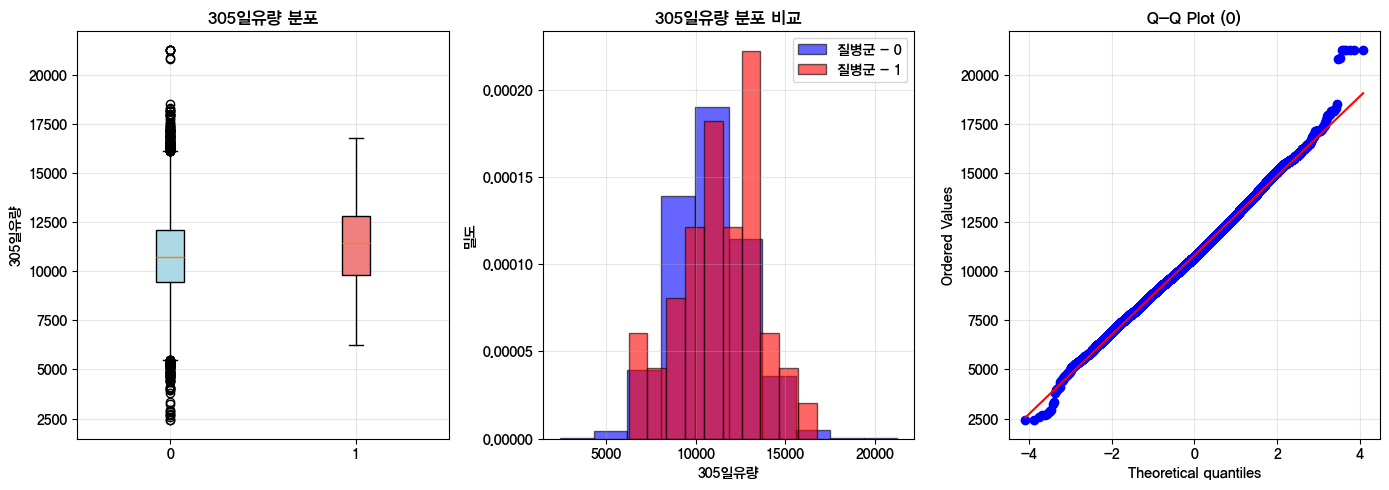


[등분산성 검정]
----------------------------------------
0.24941181643572147
Levene's test p-value: 0.2494

[데이터 정규성 검정] n=31719
----------------------------------------
왜도(Skewness): 0.155
첨도(Kurtosis): 0.189
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=47
----------------------------------------
왜도(Skewness): -0.161
첨도(Kurtosis): -0.162
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Student's t-test 결과:
t = -1.8709, p = 0.0614
Cohen's d = -0.255 (작은 효과)

[결론]
❌ p-value(0.0614) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음


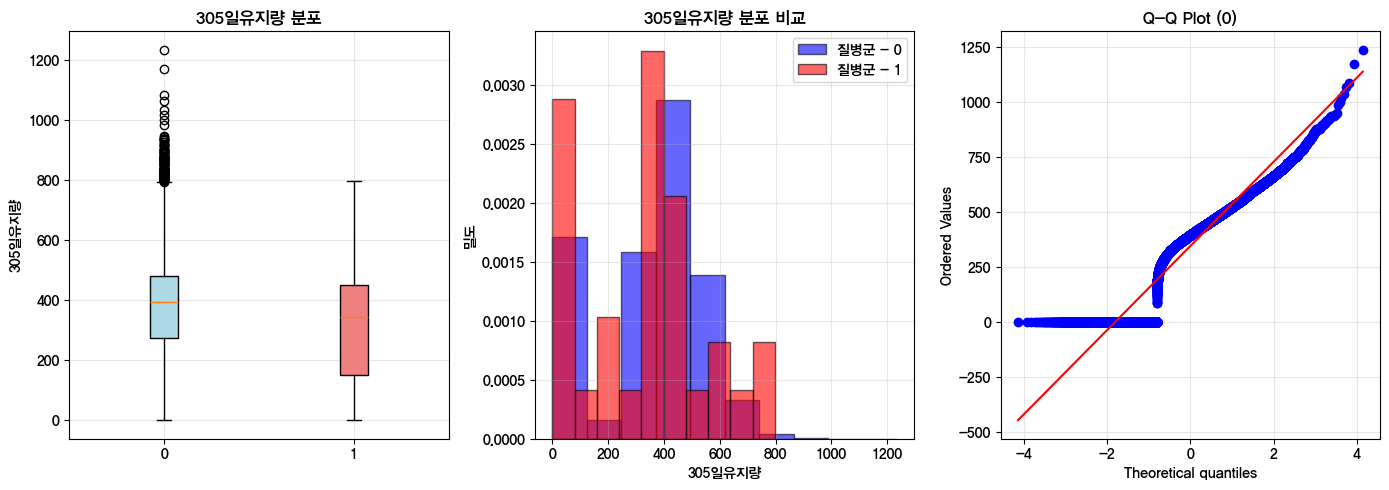


[등분산성 검정]
----------------------------------------
0.13066316634754643
Levene's test p-value: 0.1307

[데이터 정규성 검정] n=40203
----------------------------------------
왜도(Skewness): -0.595
첨도(Kurtosis): -0.552
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=61
----------------------------------------
왜도(Skewness): 0.137
첨도(Kurtosis): -0.735
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Student's t-test 결과:
t = 0.9233, p = 0.3558
Cohen's d = 0.110 (매우 작은 효과)

[결론]
❌ p-value(0.3558) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음


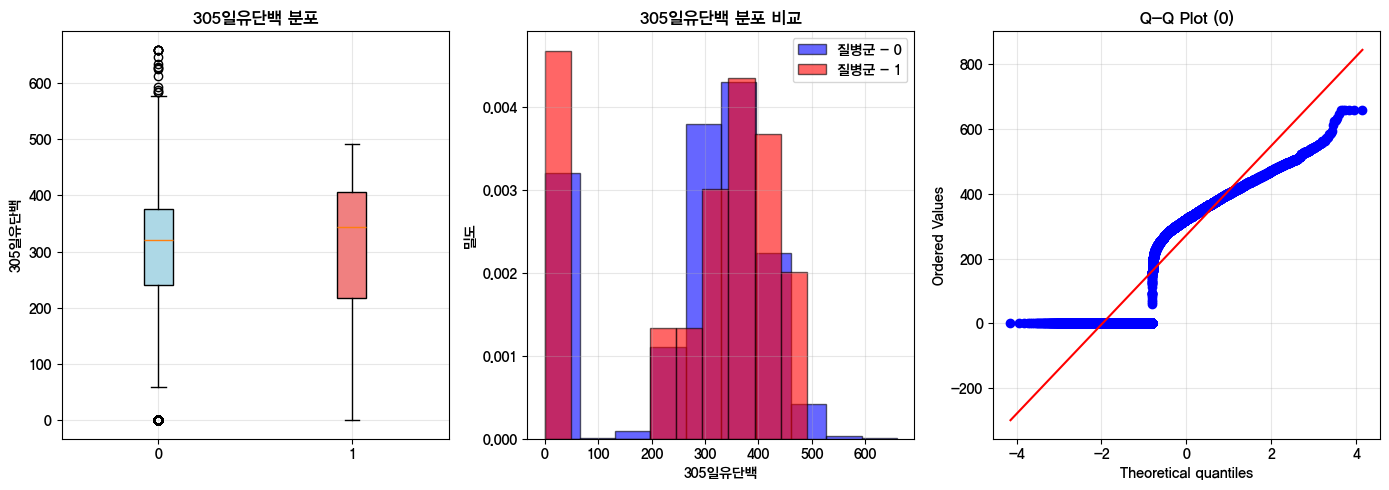


[등분산성 검정]
----------------------------------------
0.31663654424972354
Levene's test p-value: 0.3166

[데이터 정규성 검정] n=40203
----------------------------------------
왜도(Skewness): -0.910
첨도(Kurtosis): -0.503
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=61
----------------------------------------
왜도(Skewness): -0.828
첨도(Kurtosis): -0.795
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Student's t-test 결과:
t = -0.4756, p = 0.6343
Cohen's d = -0.058 (매우 작은 효과)

[결론]
❌ p-value(0.6343) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음


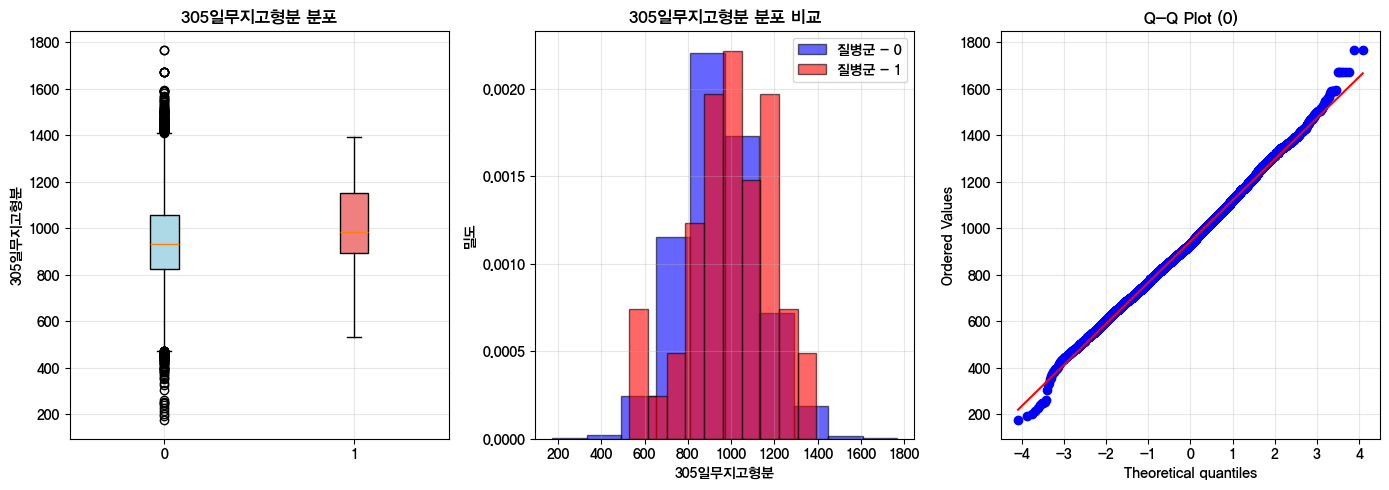


[등분산성 검정]
----------------------------------------
0.3447847069667104
Levene's test p-value: 0.3448

[데이터 정규성 검정] n=31719
----------------------------------------
왜도(Skewness): 0.154
첨도(Kurtosis): 0.086
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=47
----------------------------------------
왜도(Skewness): -0.308
첨도(Kurtosis): -0.140
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Student's t-test 결과:
t = -2.0322, p = 0.0421
Cohen's d = -0.278 (작은 효과)

[결론]
✅ p-value(0.0421) < 0.05 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


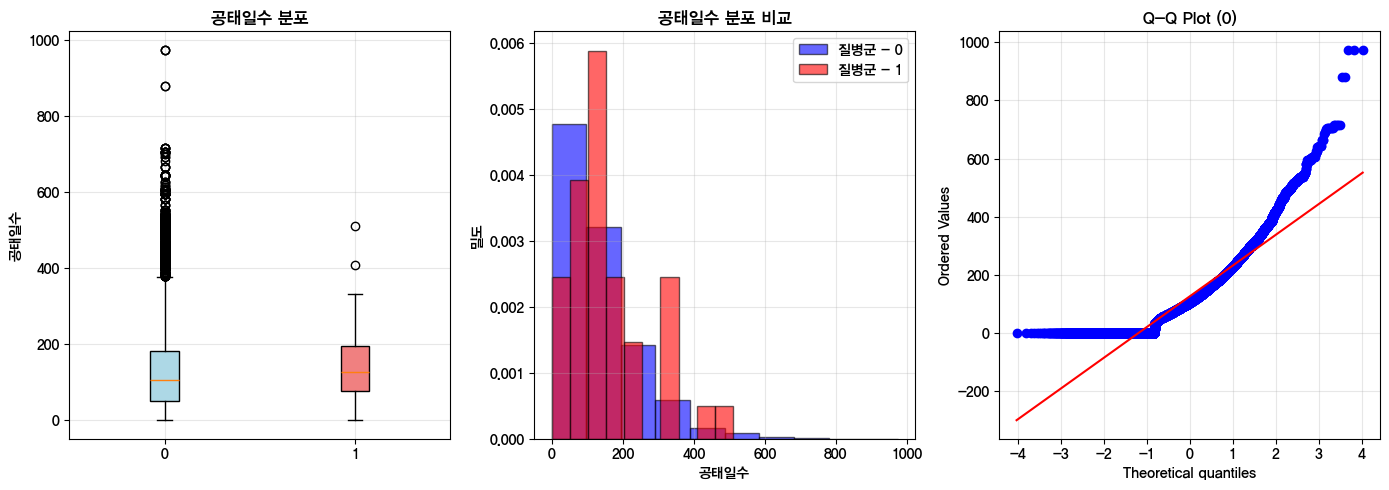


[등분산성 검정]
----------------------------------------
0.9593985117282757
Levene's test p-value: 0.9594

[데이터 정규성 검정] n=24498
----------------------------------------
왜도(Skewness): 1.278
첨도(Kurtosis): 2.506
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=40
----------------------------------------
왜도(Skewness): 1.032
첨도(Kurtosis): 0.888
추가 Shapiro-Wilk p-value: 0.0062
결과: ❌ 정규분포 가정 위반 (Shapiro p=≤0.05)

[가설검정]
----------------------------------------
H₀: 두 클래스의 분포가 같다 (중앙값 차이가 없다)
H₁: 두 클래스의 분포가 다르다 (중앙값 차이가 있다)
유의수준: α = 0.05

Mann-Whitney U test 결과:
U = 409272.0000, p = 0.0702

[결론]
❌ p-value(0.0702) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음


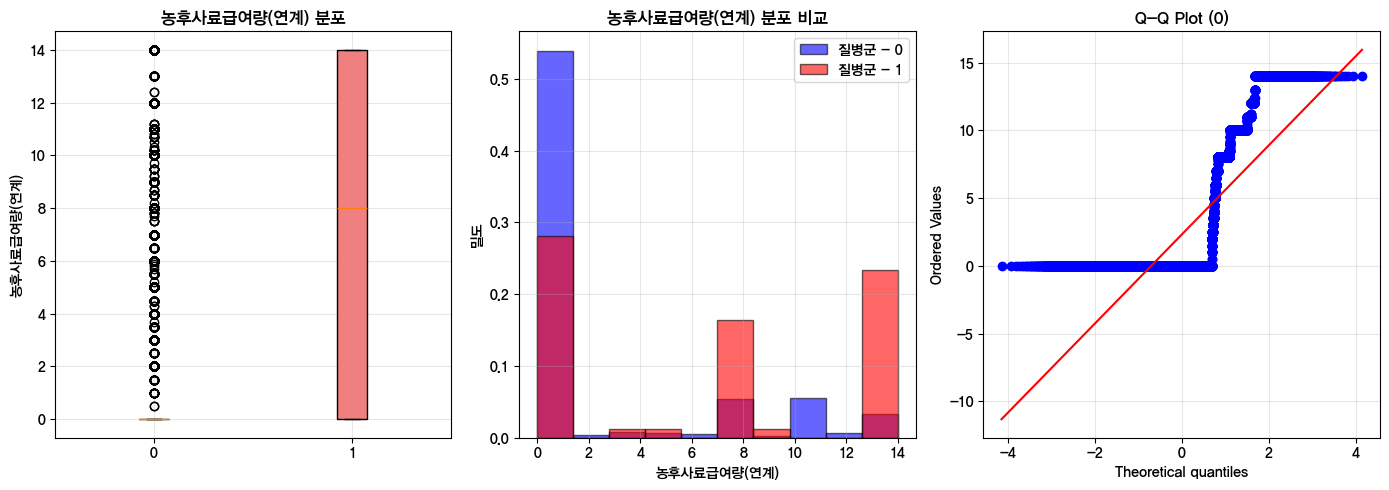


[등분산성 검정]
----------------------------------------
9.188054878458502e-08
Levene's test p-value: 0.0000

[데이터 정규성 검정] n=40203
----------------------------------------
왜도(Skewness): 1.551
첨도(Kurtosis): 0.848
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=61
----------------------------------------
왜도(Skewness): 0.050
첨도(Kurtosis): -1.647
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Welch's t-test 결과:
t = -5.6657, p = 0.0000
Cohen's d = -0.833 (큰 효과)

[결론]
✅ p-value(0.0000) < 0.05 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


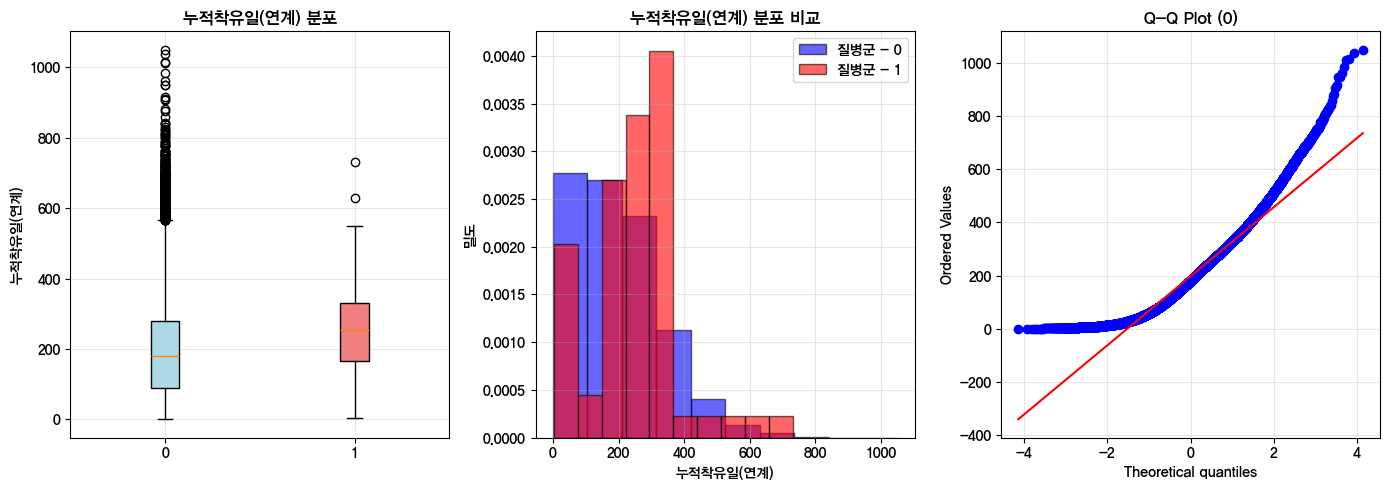


[등분산성 검정]
----------------------------------------
0.8364519390029463
Levene's test p-value: 0.8365

[데이터 정규성 검정] n=40203
----------------------------------------
왜도(Skewness): 0.854
첨도(Kurtosis): 0.911
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=61
----------------------------------------
왜도(Skewness): 0.548
첨도(Kurtosis): 1.190
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Student's t-test 결과:
t = -3.1234, p = 0.0018
Cohen's d = -0.381 (작은 효과)

[결론]
✅ p-value(0.0018) < 0.05 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


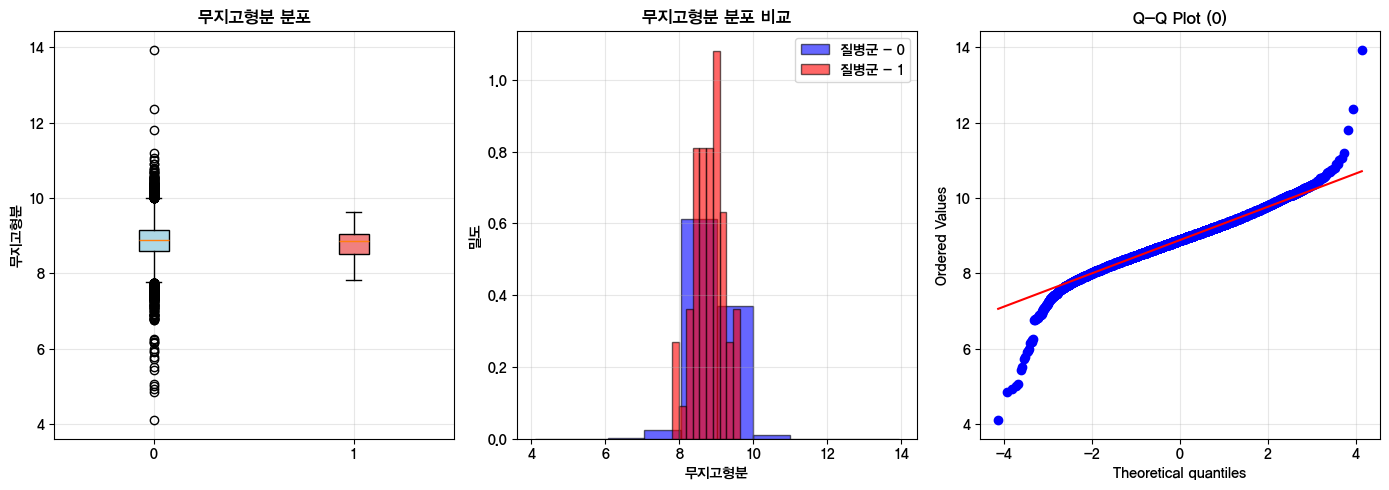


[등분산성 검정]
----------------------------------------
0.7795632643122449
Levene's test p-value: 0.7796

[데이터 정규성 검정] n=40203
----------------------------------------
왜도(Skewness): -0.103
첨도(Kurtosis): 2.553
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=61
----------------------------------------
왜도(Skewness): -0.125
첨도(Kurtosis): -0.231
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Student's t-test 결과:
t = 1.5782, p = 0.1145
Cohen's d = 0.209 (작은 효과)

[결론]
❌ p-value(0.1145) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음


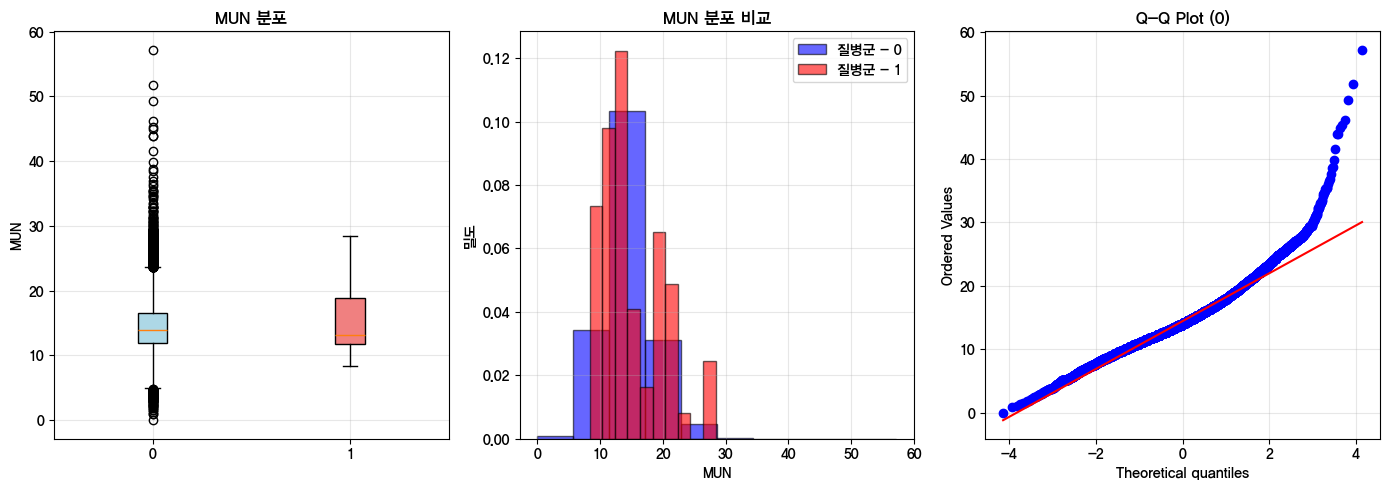


[등분산성 검정]
----------------------------------------
0.0025499083119051016
Levene's test p-value: 0.0025

[데이터 정규성 검정] n=40203
----------------------------------------
왜도(Skewness): 0.788
첨도(Kurtosis): 2.462
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=61
----------------------------------------
왜도(Skewness): 0.875
첨도(Kurtosis): 0.160
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Welch's t-test 결과:
t = -0.9764, p = 0.3328
Cohen's d = -0.141 (매우 작은 효과)

[결론]
❌ p-value(0.3328) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음


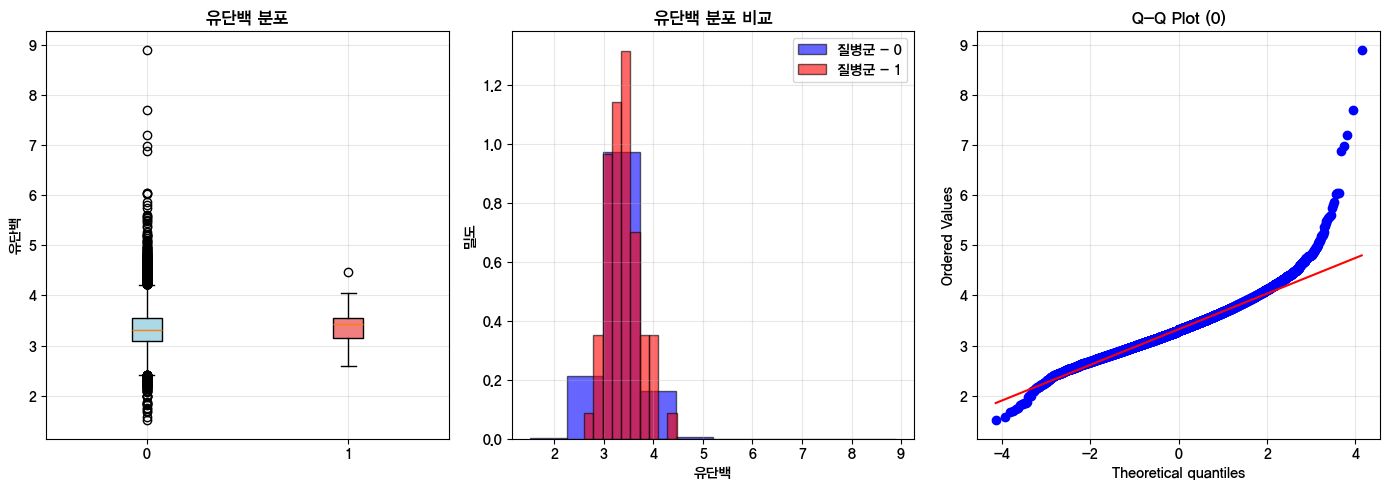


[등분산성 검정]
----------------------------------------
0.5510180502939773
Levene's test p-value: 0.5510

[데이터 정규성 검정] n=40203
----------------------------------------
왜도(Skewness): 0.723
첨도(Kurtosis): 4.149
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=61
----------------------------------------
왜도(Skewness): 0.513
첨도(Kurtosis): 0.782
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Student's t-test 결과:
t = -1.4307, p = 0.1525
Cohen's d = -0.189 (매우 작은 효과)

[결론]
❌ p-value(0.1525) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음


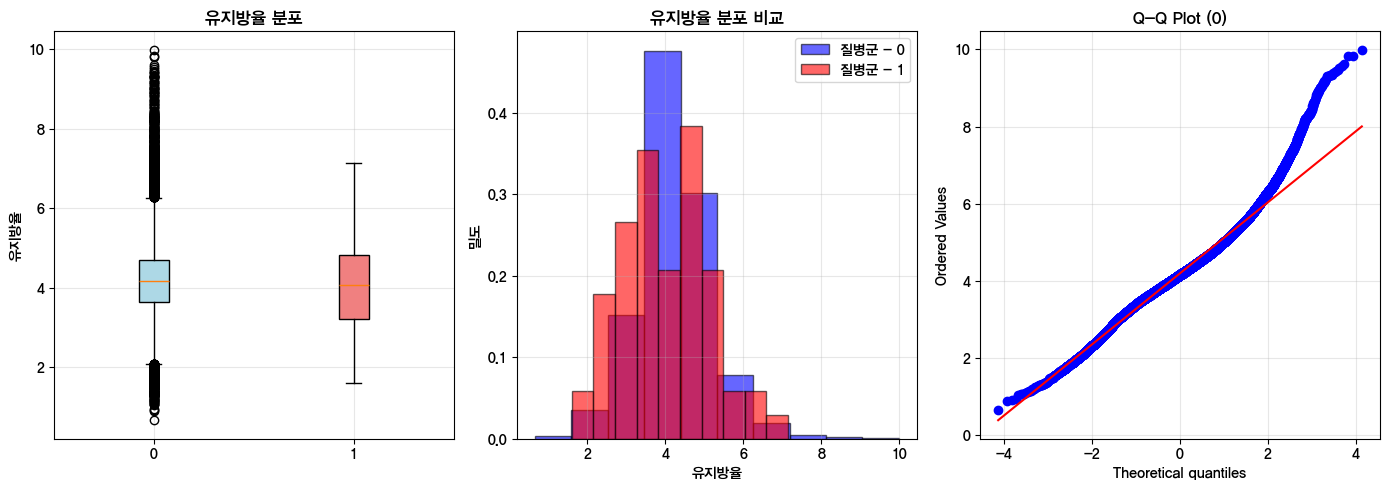


[등분산성 검정]
----------------------------------------
0.0010152007431769015
Levene's test p-value: 0.0010

[데이터 정규성 검정] n=40203
----------------------------------------
왜도(Skewness): 0.505
첨도(Kurtosis): 2.032
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=61
----------------------------------------
왜도(Skewness): 0.205
첨도(Kurtosis): -0.224
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Welch's t-test 결과:
t = 1.2024, p = 0.2339
Cohen's d = 0.171 (매우 작은 효과)

[결론]
❌ p-value(0.2339) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음


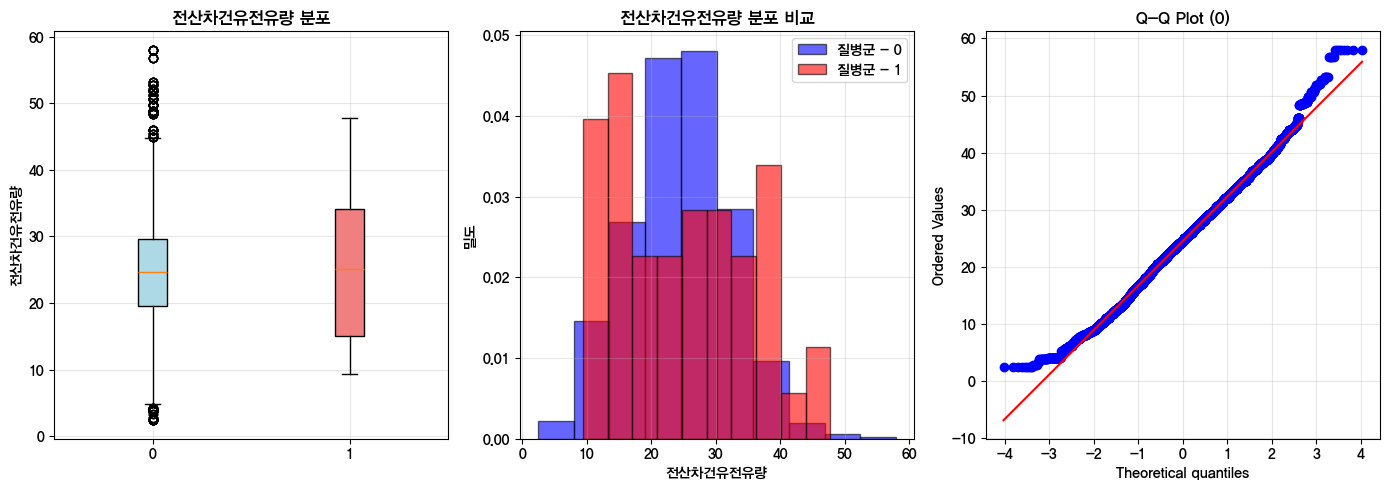


[등분산성 검정]
----------------------------------------
1.789235084665694e-05
Levene's test p-value: 0.0000

[데이터 정규성 검정] n=24675
----------------------------------------
왜도(Skewness): 0.073
첨도(Kurtosis): 0.093
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=46
----------------------------------------
왜도(Skewness): 0.237
첨도(Kurtosis): -1.076
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Welch's t-test 결과:
t = -0.4598, p = 0.6478
Cohen's d = -0.078 (매우 작은 효과)

[결론]
❌ p-value(0.6478) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음


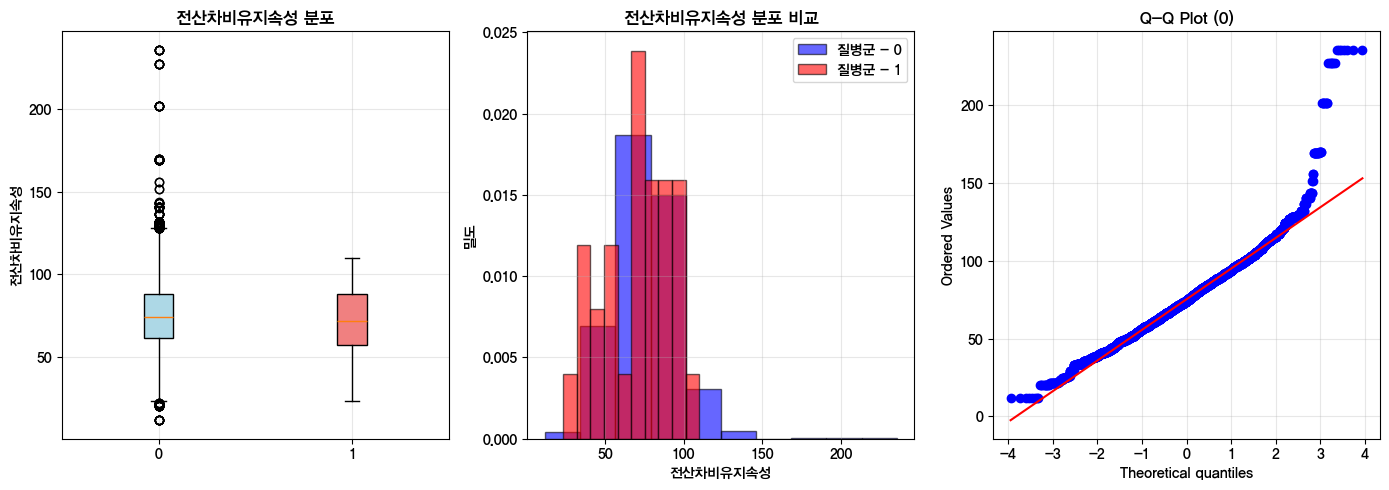


[등분산성 검정]
----------------------------------------
0.2851776199952138
Levene's test p-value: 0.2852

[데이터 정규성 검정] n=17589
----------------------------------------
왜도(Skewness): 0.695
첨도(Kurtosis): 3.569
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=29
----------------------------------------
왜도(Skewness): -0.392
첨도(Kurtosis): -0.773
Shapiro-Wilk p-value: 0.3122
결과: ✅ 정규분포 가정 충족 (Shapiro p=>0.05)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Student's t-test 결과:
t = 1.2495, p = 0.2115
Cohen's d = 0.217 (작은 효과)

[결론]
❌ p-value(0.2115) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음


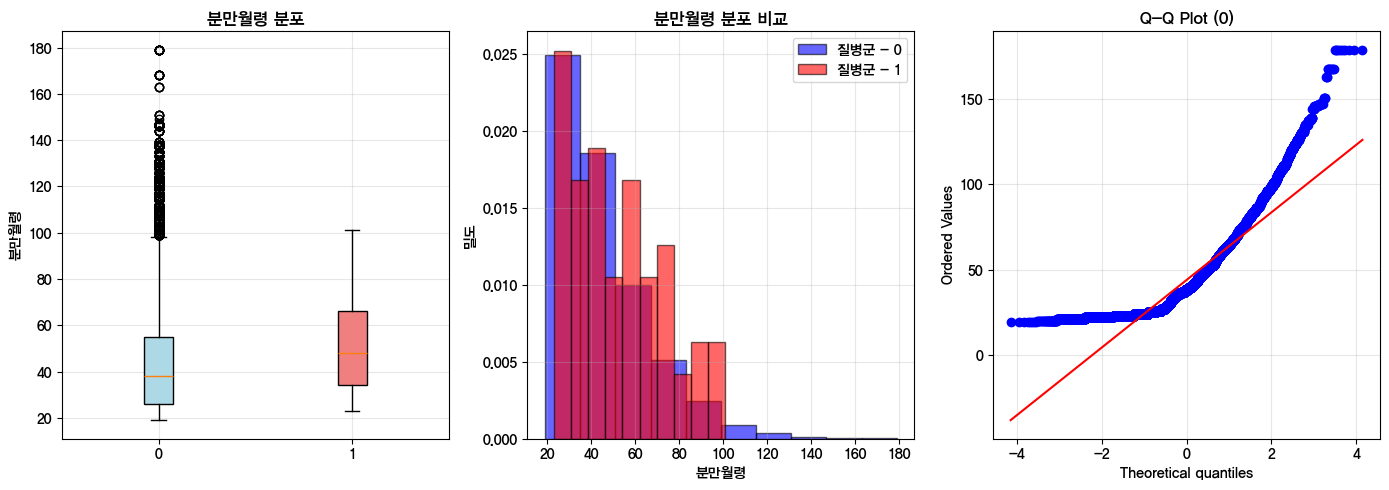


[등분산성 검정]
----------------------------------------
0.30874034603090056
Levene's test p-value: 0.3087

[데이터 정규성 검정] n=40203
----------------------------------------
왜도(Skewness): 1.385
첨도(Kurtosis): 2.330
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=61
----------------------------------------
왜도(Skewness): 0.506
첨도(Kurtosis): -0.738
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Student's t-test 결과:
t = -2.9011, p = 0.0037
Cohen's d = -0.369 (작은 효과)

[결론]
✅ p-value(0.0037) < 0.05 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


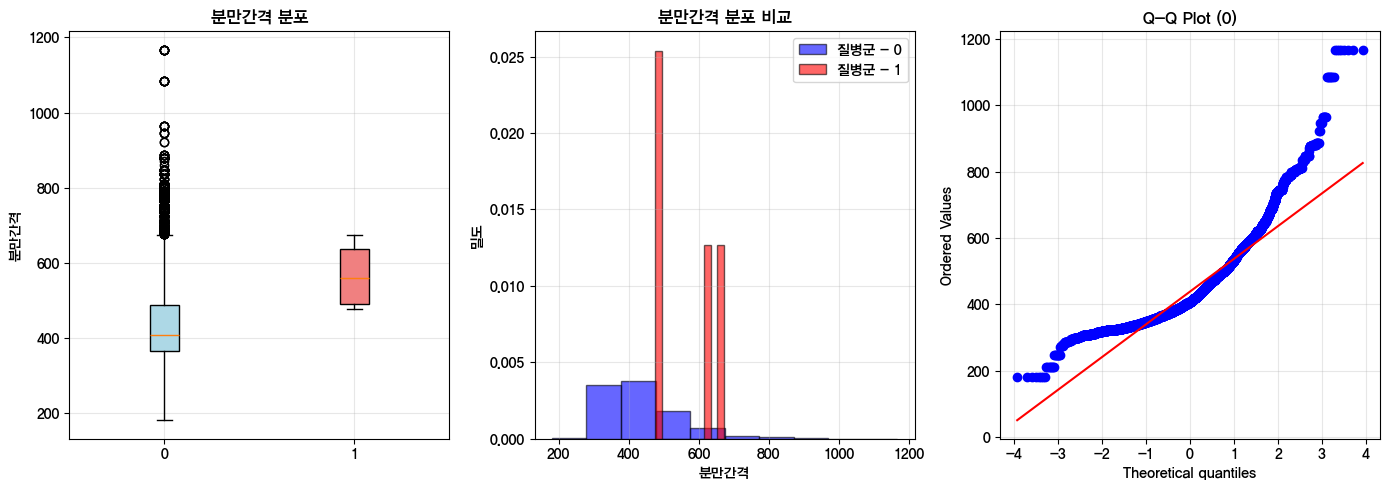


[등분산성 검정]
----------------------------------------
0.9018572090389898
Levene's test p-value: 0.9019

[데이터 정규성 검정] n=16192
----------------------------------------
왜도(Skewness): 1.556
첨도(Kurtosis): 3.573
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=4
----------------------------------------
왜도(Skewness): 0.101
첨도(Kurtosis): -1.818
Shapiro-Wilk p-value: 0.3321
결과: ✅ 정규분포 가정 충족 (Shapiro p=>0.05)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Student's t-test 결과:
t = -2.4475, p = 0.0144
Cohen's d = -1.275 (큰 효과)

[결론]
✅ p-value(0.0144) < 0.05 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


In [5]:

dv_cols = [
    '305일유량','305일유지량','305일유단백','305일무지고형분',
    '공태일수',
    '농후사료급여량(연계)',
    '누적착유일(연계)',
    '무지고형분',
    'MUN',
    '유단백',
    '유지방율',
    '전산차건유전유량',
    '전산차비유지속성',
    '분만월령',
    '분만간격'
]

result_lst =[]
iv_col = '질병군'

result_lst = ttest.execute_all(milk_data, iv_col, dv_cols)

In [6]:
small_lst = []

for dv_col, result in zip(dv_cols, result_lst):
    print('='*50)
    print(f'{dv_col} 검정 결과')
    print('='*50)
    
    r = result.to_dict()
    print(f'{r["p_value"]:.6}')
    print(r['conclusion'])
    print(r['effect_interpretation'])
    print(f'효과 크기: {r["effect_size"]:.3}')
    print()
    
    cond = True
    cond &= r['p_value'] < 0.05
    cond &= r['effect_interpretation'] in ['작은 효과', '중간 효과', '큰 효과']
    if cond :
        small_lst.append(dv_col)

305일유량 검정 결과
0.0613648
❌ p-value(0.0614) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음
작은 효과
효과 크기: -0.255

305일유지량 검정 결과
0.355836
❌ p-value(0.3558) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음
매우 작은 효과
효과 크기: 0.11

305일유단백 검정 결과
0.634331
❌ p-value(0.6343) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음
매우 작은 효과
효과 크기: -0.058

305일무지고형분 검정 결과
0.0421445
✅ p-value(0.0421) < 0.05 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음
작은 효과
효과 크기: -0.278

공태일수 검정 결과
0.0702222
❌ p-value(0.0702) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음
작은 효과
효과 크기: -0.165

농후사료급여량(연계) 검정 결과
4.3913e-07
✅ p-value(0.0000) < 0.05 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음
큰 효과
효과 크기: -0.833

누적착유일(연계) 검정 결과
0.00178887
✅ p-value(0.0018) < 0.05 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음
작은 효과
효과 크기: -0.381

무지고형분 검정 결과
0.11453
❌ p-value(0.1145) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음
작은 효과
효과 크기: 0.209

MUN 검정 결과
0.332779
❌ p-value(0.3328) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음
매우 작은 효과
효과 크기: -0.141

유단백 검정 결과
0.15251
❌ p-value(0.1525) ≥ 0.05 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음
매우 작은 효과
효과 크기: -

In [7]:
small_lst

['305일무지고형분', '농후사료급여량(연계)', '누적착유일(연계)', '분만월령', '분만간격']

## 카이제곱 검정

In [8]:
chi_test = Chi2Test()

In [9]:

dv_cols = ['계절', '산차']

result_lst =[]
iv_col = '질병군'

result_lst = chi_test.execute_all(milk_data, iv_col, dv_cols)


[기대빈도 확인]
----------------------------------------
최소 기대빈도: 12.61
5 미만 셀: 0/8 (0.0%)
✅ 카이제곱검정 사용 가능

[기대빈도]
계절         1         2         3        4
질병군                                      
0    8310.39  10785.63  11261.91  9845.06
1      12.61     16.37     17.09    14.94

[표준화 잔차]


계절,1,2,3,4
질병군,,,,
0,0.14,-0.29,0.03,0.15
1,-3.55,7.57,-0.75,-3.86


(|잔차| > 2: 유의한 차이, |잔차| > 3: 매우 강한 연관성)

[결론]
✅ p-value(0.0000) < 0.05 → 귀무가설 기각
   질병군과(와) 계절은(는) 관련이 있음   효과 크기: 매우 약한 관계

[사후분석]
   표준화 잔차 |값| > 2인 셀 해석:
   표준화 잔차 |값| > 2인 셀 해석:
   • 1 - 1: 예상보다 적음 (잔차=-3.55)
   • 1 - 2: 예상보다 많음 (잔차=7.57)
   • 1 - 4: 예상보다 적음 (잔차=-3.86)

[기대빈도 확인]
----------------------------------------
최소 기대빈도: 0.02
5 미만 셀: 6/20 (30.0%)
⚠️ 주의: Fisher's exact test 사용 권장
   (기대빈도가 너무 작아 카이제곱 검정 부정확)

[기대빈도]
산차         1         2       3        4       5       6       7       8   \
질병군                                                                        
0    15370.68  10944.39  6458.2  3930.04  2108.8  804.78  365.45  145.78   
1       23.32     16.61     9.8     5.96     3.2    1.22    0.55    0.22   

산차     9      10  
질병군               
0    62.9  11.98  
1     0.1   0.02  

[표준화 잔차]


산차,1,2,3,4,5,6,7,8,9,10
질병군,,,,,,,,,,
0,0.08,-0.0,-0.03,-0.08,-0.02,-0.06,0.03,0.02,0.01,0.01
1,-1.93,0.1,0.70,2.06,0.45,1.61,-0.74,-0.47,-0.31,-0.13


(|잔차| > 2: 유의한 차이, |잔차| > 3: 매우 강한 연관성)

[결론]
❌ p-value(0.2031) ≥ 0.05 → 귀무가설 채택   질병군과(와) 산차은(는) 독립적임 (연관 없음)
